# Atticus Soane
# ADI/Crank Nicholson Algorithms


# Problem 1
# Part a)
Given the standard second order finite difference approximation: $$D_{0}^{2}u_{j} = \frac{u_{j-1} - 2u_{j} + u_{j+1}}{h^{2}}$$ and $v_{j}^{(m)} = e^{imjh}$, prove that $$D_{0}^{2}v_{j}^{(m)} = \frac{2}{h^{2}}(\text{cos}mh - 1)v_{j}^{(m)}$$

We will begin by substituting $e^{imjh}$ for $u_{j}$: $$D_{0}^{2}v_{j}^{(m)} = \frac{1}{h^{2}}\bigg(e^{im(j-1)h} - 2e^{imjh} + e^{im(j+1)h}\bigg)$$ Next, we will factor out $e^{imjh}$: $$D_{0}^{2}v_{j}^{(m)} = \frac{e^{imjh}}{h^{2}}\bigg(e^{-imh} - 2 + e^{imh}\bigg)$$ As we know that $e^{-imh} + e^{imh} = 2\text{cos}mh$, we can factor out the $2$ and write this as: $$D_{0}^{2}v_{j}^{(m)} = \frac{2e^{imjh}}{h^{2}}\bigg(\text{cos}mh - 1 \bigg)$$ Substituting $v_{j}^{(m)} = e^{imjh}$ back in and rearranging, we arrive at the final solution: $$D_{0}^{2}v_{j}^{(m)} = \frac{2}{h^{2}}\bigg(\text{cos}mh - 1\bigg)v_{j}^{(m)}$$

# Part b)
Prove that the farthest eigenvalue from the origin approaches $\frac{-4}{h^{2}}$ as $h \rightarrow 0$ and use this to explain why the ODE system: $$\frac{du_{j}(t)}{dt} = D_{0}^{2}u_{j}(t)$$ is stiff. 

Because $-1 \leq \text{cos}mh \leq 1$, the eigenvalue $\lambda_{m} = \frac{2}{h^{2}}\bigg(\text{cos}mh - 1 \bigg)$ for a given value of $h$ is farthest from the origin when $\text{cos}mh = -1$. Thus, plugging in $-1$ for $\text{cos}mh$: $$\lambda_{m} = \frac{2}{h^{2}}\bigg(-1 -1 \bigg)\:=\:\frac{-4}{h^{2}}$$ Thus, we know that $$\frac{-4}{h^{2}} \rightarrow -\infty,\:h\rightarrow 0$$ and as the eigenvalues are extremely large as $h$ goes to $0$, the stiffness ratio $$\frac{|\lambda_{max}|}{|\lambda_{min}|}$$ is very large, and thus the system is stiff. 

# Problem 2
Consider the heat equation in the unit square $[0,1]\: \text{x}\: [0,1]$: $$u_{t} = u_{xx} + u_{yy}$$ with the initial condition $$u(0,x,y)= sin(\pi x)sin(\pi y)$$ and the homogeneous Dirichlet boundary condition $u = 0$

# Part a)
Implement the ADI method to find an approximation to this initial-boundary value problem. Determine $h$ and $k$ so that the numerical approximation is well resolved in both space and time. Does numerical stability play a role in your choice of $k$ and $h$?

Because the ADI method is unconditionally stable, numerical stability will not play a role in the selection of $k, h$. 

In [1]:
#This code was written by Atticus Soane in order to execute the tridiagonal algorithm from the notes.
#It will take four lists or arrays as inputs that represent the three diagonals from the tridiagonal matrix, as well
#as the solution matrix d.
#And it will return a list or array of the x-values that solve the system. 
def triSolver(a, b, c, d):
    n = len(a)
    m = [] #this is an empty list to hold the m-values to be generated
    l = [] #this is an empty list to thold the l-values
    m.append(a[0])
    for j in range(n-1): #this for loop generates the m and l values 
        l.append(c[j] / m[j])
        m.append(a[j+1] - (l[j]* b[j]))
    y = [] #this holds my y-values to perform the Ly = d forward substition 
    y.append(d[0])
    for i in range(1, n): #forward substitution loop
        y.append(d[i] - (l[i-1] * y[i-1]))
    x = [0] * n #this will hold my x-values to perform the Ux = y backwards substitution 
    x[n-1] = y[-1] / m[-1]
    for k in range(n-2, -1, -1): #performs the backwards substitution. 
        x[k] = (y[k] -(b[k] * x[k+1]))/m[k]
    return(x)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

pi = np.pi
#this function is designed to set the initial condition given in the problem. As an input, it takes an x-value and 
#a y-value, and as an output it returns the value of the function.
def I(x, y):
    return(np.sin(pi*x) * np.sin(pi*y))
#this function is designed to carry out the ADI algorithm. As an input, it takes I, the initial condition function,
# upper_x and upper_y, which set the x,y grid that the ADI will be carried out over, x_step_num and y_step_num, which
#set the step length in the x and y directions, T, which is the length of time, k, the size of the time step, and then
#a value for sigma. The function has three outputs: the values used for x and y for plotting purposes, and then 
#u, which is the approximation to the function u_{t} at the given time step T. 
def ADI(I, upper_x, upper_y, x_step_num, y_step_num, T, k, sigma):
    x = np.linspace(0, upper_x, x_step_num) #generates range of x-values
    y = np.linspace(0, upper_y, y_step_num) #generates range of y-values
    t = 0
    x_step = x[1] - x[0] #returns x,y step values
    y_step = y[1] - y[0]
    alpha_x = (k * sigma)/ (x_step**2) #generates the values of alpha for x,y (which in this case is the same)
    alpha_y = (k * sigma)/ (y_step**2)
    u = np.zeros((x_step_num, y_step_num)) #a N x 1 zero vector to store the final approximations for U
    u_x = np.zeros((x_step_num, y_step_num)) #N x 1 zero vector to store the approximations after the x-sweep
    for i in range(1, x_step_num-1): #for loop to set initial condition
        for j in range(1, y_step_num-1):
            u[i,j] = I(x[i], y[j])
    #NOTE: I created different alphas and different tridiagonal matrices for the x and y direction sweeps
    #even though in this case they end up being the same, but that may not always be the case
    main_x = np.ones(x_step_num) #for loop to set the main diagonal of the tridiagonal matrix for the x-sweep
    for i in range(1, x_step_num - 1):
        main_x[i] = (2 + (2*alpha_x))
    upper_x = np.zeros(x_step_num - 1) #for loop to set the upper diagonal for the x-sweep
    for i in range(1, x_step_num - 1):
        upper_x[i] = (-alpha_x)
    lower_x = np.zeros(x_step_num - 1) #for loop to set the lower diagonal for the x-sweep
    for i in range(0, x_step_num - 2):
        lower_x[i] = (-alpha_x)
    main_y = np.ones(y_step_num) #main diagonal for the y-sweep
    for i in range(1, y_step_num - 1):
        main_y[i] = (2 + (2*alpha_y))
    upper_y = np.zeros(y_step_num - 1) #upper diagonal for the y-sweep
    for i in range(1, y_step_num - 1):
        upper_y[i] = (-alpha_y)
    lower_y = np.zeros(y_step_num - 1) #lower diagonal for the #y-sweep
    for i in range(0, y_step_num - 2):
        lower_y[i] = (-alpha_y)
    while t <= T: #while loop executes over the time steps until the final time is reached
        t += 0.5*k #first half of the time step to perform the x-sweep
        sol_x = np.zeros(x_step_num) #N x 1 zero vectors to serve as the b in the Ax = b equation for the tridiagonal
        sol_y = np.zeros(y_step_num)
        for j in range(1, y_step_num-1): #x-direction sweep, iterating over each row at each column value
            for i in range(1, x_step_num -1):
                sol_x[i] = 2*u[i,j] + (alpha_y * (u[i, j-1] - 2*u[i, j] + u[i,j+1]))
            u_col = triSolver(main_x, upper_x, lower_x, sol_x)
            for i in range(x_step_num): #updating each colum of x-sweep matrix with the new approximations
                u_x[i, j] = u_col[i]
        t += 0.5*k #second half of the time step to perform the y-sweep
        for i in range(1, x_step_num-1): #y-direction sweep, iterating over each column at each row value 
            for j in range(1, y_step_num - 1):
                sol_y[j] = 2*u_x[i, j] + (alpha_x * (u_x[i-1, j] - 2*u_x[i, j] + u_x[i+1, j]))
            u_col2 = triSolver(main_y, upper_y, lower_y, sol_y)
            for j in range(y_step_num): #updating each row of the final u matrix with the new approximations
                u[i, j] = u_col2[j] 
    return(x, y, u)    
        
    
    

# Part b)
Verify the accuracy of the scheme numerically, do a resolution study to estimate the order of convergence of the method. 

# Option 1- Numerically verifying via ratio of k, k/2, k/4

To numerically verify the quadratic order of convergence, I will hold all other factors for my code the same except for the time step. I will go to $T = 0.1$ using time steps $k = .01, .005, .0025$, and then calculate the ratio $$\frac{T_{h} - T_{\frac{h}{2}}}{T_{\frac{h}{2}} - T_{\frac{h}{4}}}$$ and if this ratio is equal to $4$, we know we have second order convergence. 

In [3]:
#this code performs the ADI method at the three different values of k: 0.01, 0.005, 0.0025
xtest1, ytest1, utest1 = ADI(I, 1, 1, 20, 20, 0.1, .01, 1)
xtest2, ytest2, utest2 = ADI(I, 1, 1, 20, 20, 0.1, .005, 1)
xtest3, ytest3, utest3 = ADI(I, 1, 1, 20, 20, 0.1, .0025, 1)

In [4]:
#this code is to numerically validate the second order convergence of the method. I create three lists: 
#the numerator, which is the difference in approximations of U for the time steps K and K/2, a list for the 
#denominator, which is the difference in approximations of U for the time steps K/2 and K/4, and finally
#a list to hold the ratio of the two differences. 
upper = []
for i in range(1, len(xtest1) - 1):
    for j in range(1, len(ytest1)- 1):
        upper.append(utest1[i,j] - utest2[i,j])
lower = []
for i in range(1, len(xtest2) - 1):
    for j in range(1, len(ytest2) - 1):
        lower.append(utest2[i, j] - utest3[i, j])
ratio = []
for i in range(len(upper)):
    ratio.append(upper[i]/lower[i])


In [5]:
ratio

[4.002473048763215,
 4.002473048762914,
 4.002473048765689,
 4.002473048765921,
 4.002473048769237,
 4.002473048772473,
 4.002473048770525,
 4.002473048769235,
 4.002473048767026,
 4.002473048765502,
 4.002473048771848,
 4.0024730487688664,
 4.0024730487748945,
 4.002473048773368,
 4.0024730487716935,
 4.002473048769946,
 4.002473048767983,
 4.002473048768984,
 4.002473048769541,
 4.002473048769301,
 4.002473048770004,
 4.002473048767214,
 4.002473048773712,
 4.00247304877271,
 4.002473048770735,
 4.002473048771349,
 4.002473048769918,
 4.0024730487755855,
 4.002473048776117,
 4.002473048775221,
 4.002473048775777,
 4.002473048773016,
 4.002473048768052,
 4.002473048770544,
 4.002473048769302,
 4.002473048769542,
 4.0024730487646245,
 4.00247304876569,
 4.00247304876614,
 4.0024730487683176,
 4.00247304876864,
 4.002473048773175,
 4.002473048769614,
 4.002473048769958,
 4.002473048774152,
 4.0024730487706375,
 4.002473048776462,
 4.002473048772292,
 4.002473048775686,
 4.00247304877244

As each value in the list above is equal to $4$, we have proved second order convergence. 

# Option 2- Proving second order convergence using Taylor Expansion

Because the ADI method is a two step method, we can separate the method into the two time steps: $$\frac{U_{j,l}^{n+\frac{1}{2}} - U_{j,l}^{n}}{\frac{k}{2}} = U_{j,l}^{n} + \alpha\bigg(D_{hx}^{2}U_{j,l}^{n+\frac{1}{2}} + D_{hy}^{2}U_{j,l}^{n}\bigg)$$ $$\frac{U_{j,l}^{n+1} - U_{j,l}^{n+\frac{1}{2}}}{\frac{k}{2}} = U_{j,l}^{n+\frac{1}{2}} + \alpha\bigg(D_{hx}^{2}U_{j,l}^{n+\frac{1}{2}} + D_{hy}^{2}U_{j,l}^{n+1}\bigg) $$ Thus, we will Taylor expand around the time step $U_{j,l}^{n+\frac{1}{2}}$: $$U_{j,l}^{n+1} = U_{j,l}^{n+\frac{1}{2}} + U_{t}\bigg(\frac{k}{2}\bigg) + U_{tt}\bigg(\frac{k}{2}\bigg)^{2} + U_{ttt}\bigg(\frac{k}{2}\bigg)^{3} + O\bigg(k^{4}\bigg) +...$$ $$U_{j,l}^{n} = U_{j,l}^{n+\frac{1}{2}} - U_{t}\bigg(\frac{k}{2}\bigg) + U_{tt}\bigg(\frac{k}{2}\bigg)^{2} - U_{ttt}\bigg(\frac{k}{2}\bigg)^{3} + O\bigg(k^{4}\bigg) - ...$$ Thus, subtracting the expansion for $U_{j,l}^{n+1} - U_{j,l}^{n}$, we arrive at the following expression: $$U_{j,l}^{n+1} - U_{j,l}^{n} = \bigg[U_{j,l}^{n+\frac{1}{2}} - U_{j,l}^{n+\frac{1}{2}}\bigg] + \bigg[\bigg(\frac{k}{2}\bigg)U_{t} + \bigg(\frac{k}{2}\bigg)U_{t}\bigg] + \bigg[\frac{1}{2!}\bigg(\frac{k}{2}\bigg)^{2}U_{tt} - \frac{1}{2!}\bigg(\frac{k}{2}\bigg)^{2}U_{tt}\bigg] + \bigg[\frac{1}{3!}\bigg(\frac{k}{2}\bigg)^{3}U_{ttt} + \frac{1}{3!}\bigg(\frac{k}{2}\bigg)^{3}U_{ttt}\bigg] + O\bigg(k^{4}\bigg)+....$$ which yields the following expression (as the $k^{4}$ terms would cancel, $O(k^{5})$ is the next term in the sequence): $$U_{j,l}^{n+1} - U_{j,l}^{n} = kU_{t} + \frac{2}{3!}\bigg(\frac{k}{2}\bigg)^{3}U_{ttt} + O\bigg(k^{5}\bigg) +...$$ Now dividing the expression by $k$: $$\frac{U_{j,l}^{n+1} - U_{j,l}^{n}}{k} = U_{t} + \frac{1}{24}k^{2}U_{ttt} + O(k^{4}) +...$$ And rearranging, we arrive at: $$U_{t} = \frac{U_{j,l}^{n+1} - U_{j,l}^{n}}{k} - \frac{1}{24}k^{2}U_{ttt} - O(k^{4}) -...$$ Thus, the convergence of the method is second order in time: $O(k^{2})$

Next, to determine the order of convergence in space, we will Taylor expand $D_{hx}^{2}$ around $U_{j}^{n}$. $$U_{j+1}^{n} = U_{j}^{n} + \bigg(h\bigg)U_{x} + \bigg(\frac{h^{2}}{2}\bigg)U_{xx} + \bigg(\frac{h^{3}}{3!}\bigg)U_{xxx} + \bigg(\frac{h^{4}}{24}\bigg)U_{xxxx} + O\bigg(h^{5}\bigg) + ...$$ $$U_{j-1}^{n} = U_{j}^{n} - \bigg(h\bigg)U_{x} + \bigg(\frac{h^{2}}{2}\bigg)U_{xx} - \bigg(\frac{h^{3}}{3!}\bigg)U_{xxx} + \bigg(\frac{h^{4}}{24}\bigg)U_{xxxx} - O\bigg(h^{5}\bigg) + ... $$ Thus, the second order finite difference scheme: $$D_{hx}^{2} = \frac{\bigg[U_{j}^{n} + U_{j}^{n} - 2U_{j}^{n}\bigg] + \bigg[\bigg(h\bigg)U_{x} - \bigg(h\bigg)U_{x}\bigg] + \bigg[\bigg(\frac{h^{2}}{2}\bigg)U_{xx} +\bigg( \frac{h^{2}}{2}\bigg)U_{xx}\bigg] + \bigg[\bigg(\frac{h^{3}}{3!}\bigg)U_{xxx} -\bigg(\frac{h^{3}}{3!}\bigg)U_{xxx}\bigg] + \bigg[\bigg(\frac{h^{4}}{4!}\bigg)U_{xxxx}+\bigg(\frac{h^{4}}{4!}\bigg)U_{xxxx}\bigg] + O\bigg(h^{5}\bigg)}{h^{2}}$$ After cancellatons, this reduces to: $$D_{hx}^{2} = U_{xx} + \bigg(\frac{2h^{2}}{4!}\bigg)U_{xxxx} + O\bigg(h^{4}\bigg)$$ Thus, we can clearly see that the approximation is $O\bigg(h_{x}^{2}\bigg)$. Without loss of generality, the same calculations could be performed for finite difference $D_{hy}^{2}$, and thus we can say that the method is second order in space and time: $$O\bigg(k^{2} + h_{x}^{2} + h_{y}^{2}\bigg)$$ The rate of convergence is second order. 

# Part c)
Plot the approximation at three different time steps to that illustrate its time evolution

I will plot the approximation $u$ with respect to $x,y$ at the time steps: $T= 0.1, 0.5, 1.0$. They are in three different plots because it was too difficult to see the three dimensional plots all in one plot. The shapes of the plots are the same, but you can see clearly the time evolution by looking at the scales of the $u$ values in the plots below. Below, $h_{x} = h_{y} = 0.05$, and $k = 0.01$, as the method is unconditionally stable these values were chosen arbitrarily. 

In [6]:
#this code generates the x,y, and u values at the three different time steps. 
x1, y1, u1 = ADI(I, 1, 1, 20, 20, 0.1, 0.01, 1)
x2, y2, u2 = ADI(I, 1, 1, 20, 20, 0.5, 0.01, 1)
x3, y3, u3 = ADI(I, 1, 1, 20, 20, 1.0, 0.01, 1)

In [7]:
#this code generates x,y grids to match with the u-values for 3D plotting 
x1_grid, y1_grid = np.meshgrid(x1, y1)
x2_grid, y2_grid = np.meshgrid(x2, y2)
x3_grid, y3_grid = np.meshgrid(x3, y3)


# T = 0.1

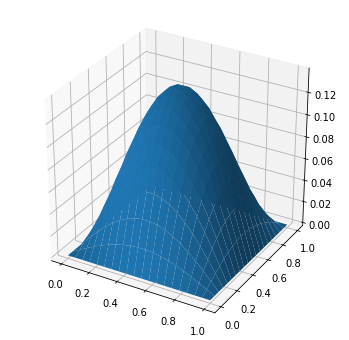

In [8]:
#this code (and the subsequent two code blocks) generate the 3D plots. 
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_grid, y1_grid, u1)
plt.show()

# T = 0.5

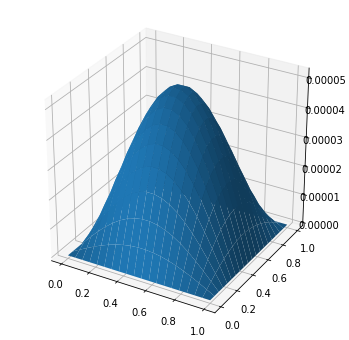

In [9]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x2_grid, y2_grid, u2)
plt.show()

# T = 1.0

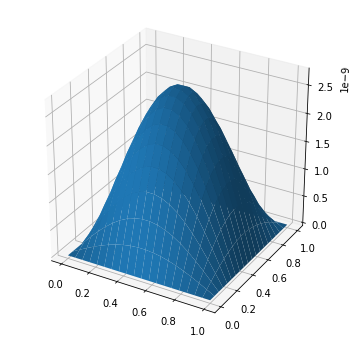

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x3_grid, y3_grid, u3)
plt.show()

# Part d)
If faced with this particular problem, would you select the Crank-Nicholson or the ADI method? 


In this case, I would select the ADI method. Because the problem is multi-dimensional, the systems of equations that would be set up by the Crank-Nicholson method are far more costly to solve as the matrix generated by the finiite difference method cannot be banded in a tridiagonal form, whereas the ADI method can be performed using a tridiagonal matrix solver at each time step and is thus far more computationally simple and less costly. 